<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXT 데이터 다루기

In [222]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [223]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 
      'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt',
      cache_dir="/content")

path_to_test_file = tf.keras.utils.get_file('test.txt', 
      'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt',
      cache_dir="/content")

In [224]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text  = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

print ( len(train_text), len(test_text) )

6937271 2318260


In [225]:
train_text[:200]

'id\tdocument\tlabel\n9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\n3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\n10265843\t너무재밓었다그래서보는것을추천한다\t0\n9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0\n6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서'

In [226]:
X_train =[]
y_train=[]
for t in train_text.split('\n')[1:]:
  # print(t)
  try:
    tmp = t.split('\t')
    X_train.append(tmp[1])
    y_train.append(int(tmp[2]))
  except:
    pass

In [227]:
y_train = np.array(y_train)
y_train.shape

(150000,)

In [228]:
X_train=  np.array(X_train)
X_train.shape

(150000,)

In [229]:
X_test =[]
y_test=[]
for t in test_text.split('\n')[1:]:
  # print(t)
  try:
    tmp = t.split('\t')
    X_test.append(tmp[1])
    y_test.append(int(tmp[2]))
  except:
    pass

In [230]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(50000,) (50000,)


In [231]:
test_Y.shape

(50000, 1)

In [232]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py

In [233]:
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string) #한글, 영문, 숫자, 괄호, 쉼표, 느낌표, 물음표, 작은 따옴표, 역따옴표제외
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

In [234]:
tmp  = []
for row in train_text.split("\n")[1:] :
  if row.count("\t") > 0:
    tmp.extend([ row.split("\t")[1] ])

tmp[:5] # 5줄만 확인하기

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [235]:
tmp = [ row.split("\t")[1] for row in train_text.split("\n")[1:]  if row.count("\t") > 0 ]

- 데이터 정제

In [236]:
X_train = list(clean_str(txt)for txt in tmp)
X_train[:3]

['아 더빙 진짜 짜증나네요 목소리', '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다']

- 공백으로 단어 분리

In [237]:
X_train = [txt.split() for txt in X_train]
X_train[:3]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다']]

In [238]:
len(X_train)

150000

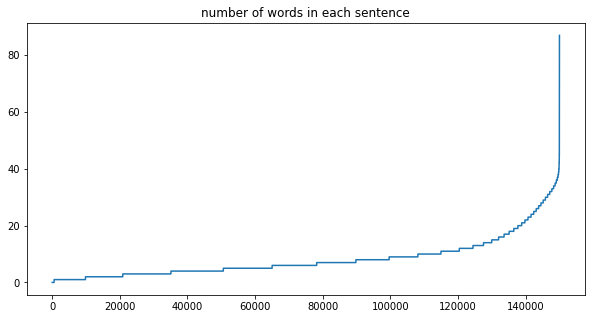

In [239]:
txt_len = [len(txt) for txt in X_train]
txt_len.sort()
plt.figure(figsize=(10,5))
plt.title('number of words in each sentence')
plt.plot(txt_len)
plt.show()

#Keras를 활용한 전처리

- 가장 빈도가 높은 단어 추출하기

### Preprocessing


In [240]:
new_X = []
for x in X_train:
  new_X.extend(x)
print(new_X[:10])

['아', '더빙', '진짜', '짜증나네요', '목소리', '흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지']


In [241]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#가장 빈도가 높은 단어 20000개의 단어만 선택 되도록 Tokenizer만들기
token1= Tokenizer(num_words=20000)
token1.fit_on_texts(tmp) #단어 인덱스 구축하기

In [242]:
words = token1.texts_to_sequences(tmp) #문자열을 정수 인덱스의 리스트로 변환
words[:5]

[[23, 936, 4, 6727, 1097],
 [602, 6117, 7052],
 [],
 [73, 356, 27, 33, 10431],
 [107, 5354, 1, 852, 568]]

In [243]:
#단어의 길이를 25개로 맞추기
words = pad_sequences(words, padding='post', maxlen = 25)
words[:3]

array([[  23,  936,    4, 6727, 1097,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 602, 6117, 7052,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]], dtype=int32)

In [244]:
words.shape

(150000, 25)

In [245]:
#길이가 50자리인 임베딩 숫자로 바꾸기
embedding = tf.keras.layers.Embedding(input_dim=20000, output_dim=50)
output = embedding(words)
print(output)

tf.Tensor(
[[[-0.04608781  0.02309358 -0.02606921 ... -0.02976433  0.0212209
   -0.03600385]
  [ 0.039421   -0.04062935  0.036401   ...  0.03049812 -0.02259492
    0.00209484]
  [-0.03659714  0.03164108 -0.03063126 ...  0.02633425 -0.04077387
   -0.03307065]
  ...
  [-0.02011057  0.00950614  0.04988133 ... -0.01860088  0.00537497
    0.04695355]
  [-0.02011057  0.00950614  0.04988133 ... -0.01860088  0.00537497
    0.04695355]
  [-0.02011057  0.00950614  0.04988133 ... -0.01860088  0.00537497
    0.04695355]]

 [[-0.04446951  0.0211047  -0.02809999 ...  0.00011232  0.04533328
   -0.04044995]
  [-0.04911723  0.02716062  0.03836579 ... -0.04173004 -0.0022845
   -0.00500346]
  [ 0.00671949  0.00266585  0.00580244 ...  0.01287231 -0.02123864
    0.03324739]
  ...
  [-0.02011057  0.00950614  0.04988133 ... -0.01860088  0.00537497
    0.04695355]
  [-0.02011057  0.00950614  0.04988133 ... -0.01860088  0.00537497
    0.04695355]
  [-0.02011057  0.00950614  0.04988133 ... -0.01860088  0.005374

In [246]:
len(output[0][0])

50

In [247]:
output[0][0]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.04608781,  0.02309358, -0.02606921, -0.0360431 ,  0.03930407,
       -0.01976111,  0.02742424,  0.00256387,  0.02289213,  0.01150422,
       -0.02533764, -0.01965104,  0.0418894 , -0.01845659,  0.00322668,
       -0.00890492, -0.03602226,  0.04692945, -0.0276507 ,  0.04328069,
        0.01260083, -0.00828215,  0.01354159,  0.00796448,  0.03248811,
        0.04193306, -0.01802586, -0.02941052,  0.0478793 ,  0.01995125,
        0.00533273,  0.04340328, -0.00696925, -0.02568682, -0.03759178,
       -0.03495346,  0.03358186,  0.04748276,  0.03464395, -0.03413256,
        0.0247323 ,  0.04338665, -0.03511175,  0.00900055, -0.01114555,
        0.00014067,  0.00433612, -0.02976433,  0.0212209 , -0.03600385],
      dtype=float32)>

### Modeling

In [260]:
y_train.shape

(150000,)

In [248]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 100, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 25, 100)           2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 2,030,302
Trainable params: 2,030,302
Non-trainable params: 0
_________________________________________________________________


In [249]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [250]:
history = model.fit(words, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 55s 59ms/step - loss: 0.4467 - accuracy: 0.7711 - val_loss: 0.3879 - val_accuracy: 0.8128
Epoch 2/5
938/938 [==============================] - 54s 58ms/step - loss: 0.3444 - accuracy: 0.8355 - val_loss: 0.3896 - val_accuracy: 0.8119
Epoch 3/5
938/938 [==============================] - 54s 58ms/step - loss: 0.3036 - accuracy: 0.8504 - val_loss: 0.4103 - val_accuracy: 0.8100
Epoch 4/5
938/938 [==============================] - 55s 58ms/step - loss: 0.2703 - accuracy: 0.8622 - val_loss: 0.4777 - val_accuracy: 0.8045
Epoch 5/5
938/938 [==============================] - 56s 60ms/step - loss: 0.2409 - accuracy: 0.8751 - val_loss: 0.5099 - val_accuracy: 0.8011


### Test

In [251]:
test_1 = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'

test_sentences = []
temp = []
for txt in test_1.split(" "):
  temp.append(txt)
  test_sentences.append(temp[:])

test_sentences

[['재미있을'],
 ['재미있을', '줄'],
 ['재미있을', '줄', '알았는데'],
 ['재미있을', '줄', '알았는데', '완전'],
 ['재미있을', '줄', '알았는데', '완전', '실망했다.'],
 ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무'],
 ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고'],
 ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이'],
 ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']]

In [253]:
X_test = token1.texts_to_sequences(test_sentences)
X_test

[[4744],
 [4744, 196],
 [4744, 196, 538],
 [4744, 196, 538, 29],
 [4744, 196, 538, 29],
 [4744, 196, 538, 29, 2],
 [4744, 196, 538, 29, 2, 12334],
 [4744, 196, 538, 29, 2, 12334, 529],
 [4744, 196, 538, 29, 2, 12334, 529]]

In [254]:
X_test = pad_sequences(X_test, padding = 'post', maxlen = 25)

In [256]:
pred1 = model.predict(X_test)

In [261]:
pred1

array([[0.04516837, 0.9548316 ],
       [0.09292251, 0.9070775 ],
       [0.31173337, 0.68826663],
       [0.28976446, 0.71023554],
       [0.28976446, 0.71023554],
       [0.37803048, 0.6219696 ],
       [0.9794845 , 0.0205155 ],
       [0.9962824 , 0.00371767],
       [0.9962824 , 0.00371767]], dtype=float32)

In [266]:
for ind, txt in enumerate(test_sentences):
  print(f"{txt} -> {pred1[ind]}")

['재미있을'] -> [0.04516837 0.9548316 ]
['재미있을', '줄'] -> [0.09292251 0.9070775 ]
['재미있을', '줄', '알았는데'] -> [0.31173337 0.68826663]
['재미있을', '줄', '알았는데', '완전'] -> [0.28976446 0.71023554]
['재미있을', '줄', '알았는데', '완전', '실망했다.'] -> [0.28976446 0.71023554]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무'] -> [0.37803048 0.6219696 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고'] -> [0.9794845 0.0205155]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이'] -> [0.9962824  0.00371767]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.'] -> [0.9962824  0.00371767]


# 사전훈련된 모델 - 전이학습

## MobileNetV2

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

In [3]:
model = MobileNetV2()
model.summary()

14540800/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________

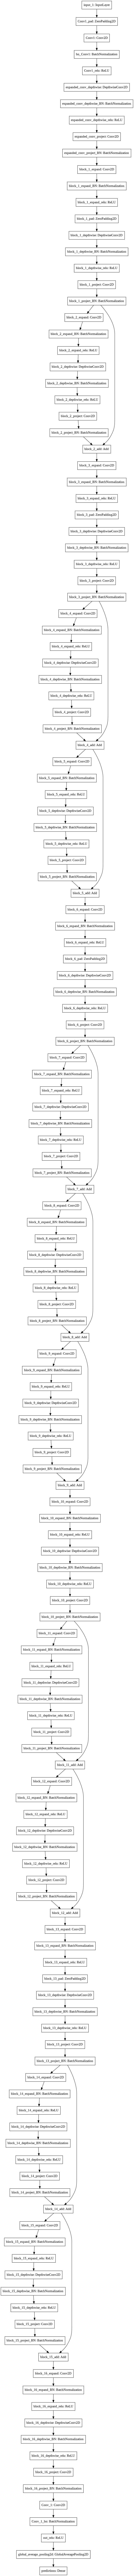

In [4]:
tf.keras.utils.plot_model(model)

In [5]:
#기존 모델에서 마지막만 추가
model1 = tf.keras.Sequential([
                              model, tf.keras.layers.Dense(10,activation='softmax')
])

- 샘플 이미지 받기

In [6]:
import os
import pathlib
content_data_url = '/content/sample_data'

In [7]:
data_root_orig = tf.keras.utils.get_file('imagenetV2', 'https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-topimages.tar.gz', cache_dir=content_data_url, extract=True)
data_root = pathlib.Path(content_data_url + '/datasets/imagenetv2-top-images-format-val')
print(data_root)

1234968576/1234964480 [==============================] - 30s 0us/step
/content/sample_data/datasets/imagenetv2-top-images-format-val


In [8]:
data = list(data_root.iterdir())
data[:10]

[PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/468'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/323'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/84'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/646'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/795'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/880'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/816'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/273'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/213'),
 PosixPath('/content/sample_data/datasets/imagenetv2-top-images-format-val/756')]

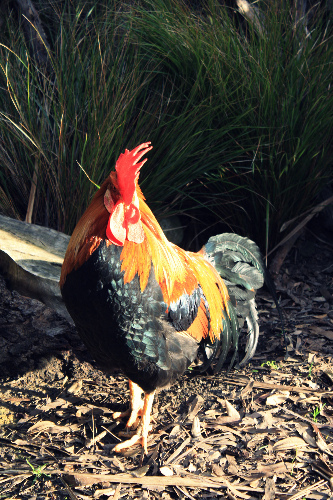

In [9]:
import PIL

data1 = list(data_root.glob("7/*.jpeg"))
# data1[:1]
PIL.Image.open( str(data1[4] ) )

In [10]:
label_file = tf.keras.utils.get_file('label.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt', cache_dir=content_data_url)
label_text = None
with open(label_file, 'r') as f:
    label_text = f.read().split('\n')[:-1]

16384/10484 [==============================================] - 0s 0us/step


In [11]:
print(len(label_text))
print(label_text[:10])
print(label_text[-10:])

1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


In [12]:
import random
import matplotlib.pyplot as plt

# 전체 이미지 읽기
all_images = list(data_root.glob('*/*'))

# 이미지 섞기
random.shuffle( all_images )

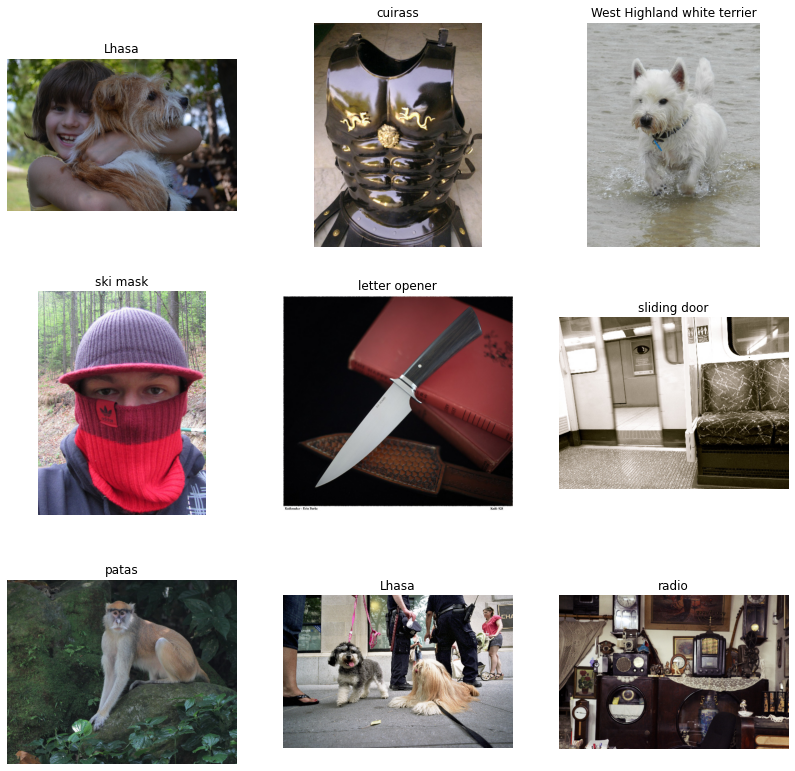

In [13]:
plt.figure( figsize=(14,14) )
for i in range(9):
  tmp_img = random.choice(all_images) # 한개의 이미지를 꺼내서 변수에 보관
  plt.subplot(3, 3, (i+1))
  plt.imshow( plt.imread(tmp_img) )
  plt.axis('off')

  idx =  int( str(tmp_img).split("/")[-2] ) + 1 
  plt.title(label_text[idx])

# Opencv

In [14]:
import cv2  # opencv
import numpy as np
tmp_img = random.choice(all_images)     # 임의의 이미지 1장 가져오기
print(tmp_img)

/content/sample_data/datasets/imagenetv2-top-images-format-val/408/9.jpeg


In [15]:
img = cv2.imread(str(tmp_img))   #파일에서 이미지 읽기
img = cv2.resize(img,dsize=(224,224) )  # 이미지 사이즈 변경
img = img /255.0                        # 정규화
img = np.expand_dims(img, axis=0)
img.shape  #(개수, 가로크기, 세로크기, 채널)

(1, 224, 224, 3)

In [17]:
#1000개의 값중에서 내림차순으로 정렬후 큰숫자 5개의 인덱스를 가져옴.
pred2 = model.predict(img)[0].argsort()[::-1][:5]  
pred2

array([408, 675, 569, 829, 867])